# Qiskit Tutorial I: Getting Started

*This is part of the Qiskit Tutorial series by Yen Lee Loh.  Edited 2023-6-4.*

**Pro tip:** In the newest versions of Jupyter Lab, you can expand or collapse each section.  Try it now!  
- Find the little triangle to the left of the section heading "1. Installing Qiskit".
- Click the triangle to collapse the section.
- Click the triangle again to expand the section.  T

**Pro tip:** You can even expand/collapse sections using the keyboard.
- Press Escape to make sure you are in *Command Mode* (not *Edit Mode*).
- Press the up or down arrow keys on the keyboard to navigate to the cell that says "1. Installing Qiskit".
- Press the left arrow to collapse the section.
- Press the right arrow to expand the section.

This is a great way to reduce clutter on your screen and navigate quickly through large notebooks.

## 1. Installing Qiskit

If you're using Binder, you shouldn't need to install anything.

If you wish to run Qiskit on your own computer, it is a good idea to do this within a *conda environment*.  Open a terminal, and type in the following commands one by one
    
    conda create --name qiskit               # create a new environment called "qiskit"
    conda activate qiskit                    # make "qiskit" the current environment
    conda install pip                        # install the pip package manager within the "qiskit" environment
    pip install qiskit                       # use pip to install the qiskit package 
    conda install -c conda-forge jupyterlab  # use conda to install other packages from conda-forge
    conda install -c conda-forge matplotlib
    conda install -c conda-forge pylatexenc
    conda install -c conda-forge regex

Every time you open this tutorial, you should do it with the "qiskit" environment:

    conda activate qiskit                    # activate this environment
    jupyter lab
    

If you're an absolute beginner and you don't want to mess with the terminal or environments, you can get started quickly by running the cells below.  (Be aware that this will permanently affect your base conda environment.)

In [6]:
pip install qiskit

In [7]:
conda install -c conda-forge pylatexenc

## 2. Import modules

If you have already installed Qiskit and its dependencies, you can start at this point.
- Make sure that the file `qute.py` is in the same folder as this Jupyter notebook.  This file contains useful functions that are missing from Qiskit, packaged into a module called *qute* (pronounced "cute"). 
- Run the cell below to import the modules that we'll be using:

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit
import qute
import importlib; importlib.reload (qute);   # Developer: need to run this if qute.py is changed


$\newcommand{\beq}{\qquad\begin{align}}$
$\newcommand{\eeq}{\end{align}}$
$\newcommand{\half}{\frac{1}{2}}$
$\newcommand{\mean}[1]{\langle #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 \rvert}$
$\newcommand{\ket}[1]{\lvert #1 \rangle}$
$\newcommand{\adag}{a^\dagger}$
$\newcommand{\mat}[1]{\underline{\underline{\mathbf{#1}}}}$


## 3. Run quantum circuit and examine statevector

Run the cell below to build and visualize your first quantum circuit:

In [6]:
cir = qiskit.QuantumCircuit(2) # create circuit with 2 qubits 
cir.x(0)                       # apply X (NOT) gate to qubit 0
cir.h(0)                       # apply H (Hadamard) gate to qubit 0
cir.cx(0,1)                    # apply CX (CNOT) gate with control qubit 0 and target qubit 1
cir.draw()                     # draw circuit

┌───┐┌───┐     
q_0: ┤ X ├┤ H ├──■──
     └───┘└───┘┌─┴─┐
q_1: ──────────┤ X ├
               └───┘

This quantum circuit performs the following operations:

$\beq
\ket{00}
\xrightarrow{~~~~~~ \hat{X}_0 ~~~~~~ } \ket{10}
\xrightarrow{~~~~~~ \hat{H}_0 ~~~~~~ } \frac{\ket{00} - \ket{10}}{\sqrt{2}}
\xrightarrow{~~~~~~ \hat{X}_{01} ~~~~~~ } \frac{\ket{00} - \ket{11}}{\sqrt{2}} .
\eeq$

Let's run the circuit on a simulator to see whether Qiskit gets this right.  The standard workflow has several steps:

In [7]:
sim = qiskit.Aer.get_backend('statevector_simulator') # set up a statevector simulator
exe = qiskit.transpile(cir, sim)                      # transpile our circuit for this simulator
job = sim.run(exe)                                    # run the circuit
res = job.result()                                    # "download" the result
psi = res.get_statevector(cir)                        # "download" the final statevector
print (psi)                                           # print the final statevector    

Statevector([ 0.70710678+0.00000000e+00j,  0.        +0.00000000e+00j,
              0.        +0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2, 2))


The statevector is $\mathbf{\Psi} = \left( \tfrac{1}{\sqrt{2}}, 0, 0, -\tfrac{1}{\sqrt{2}} \right)$.  These numbers are the amplitude coefficients of the four basis states $\ket{00}$, $\ket{01}$, $\ket{10}$, and $\ket{11}$.  Therefore the final state should be $\ket{\Psi} = \frac{1}{\sqrt{2}} \ket{00} - \frac{1}{\sqrt{2}} \ket{11}$, which agrees with our prediction.  The text output is really difficult to read.  A graphical visualization would be much better.  At the time of writing Qiskit doesn't contain a function to plot a statevector, so let's use `qute.plotStatevector()`:

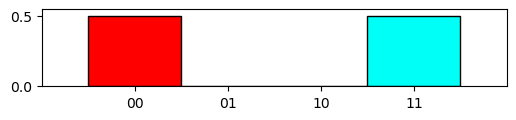

In [8]:
qute.plotStatevector(psi);

$\newcommand{\abs}[1]{\left| #1 \right|}$
The bar heights represent the *probabilities* $\abs{\Psi_{00}}^2$, $\abs{\Psi_{01}}^2$, $\abs{\Psi_{10}}^2$, and $\abs{\Psi_{11}}^2$ of each outcome if both qubits are measured.  The bar colors represent the *arguments* (or *phases*) of the amplitude coefficients, using a rainbow color scheme (matplotlib.cm.hsv).  In this example, both bars have heights of 50%, and the red and cyan colors tell us that $\Psi_{00}>0$ and $\Psi_{11}<0$.

## 4. Run quantum circuit and examine measurement results

Take the quantum circuit from the previous section, and add commands to measure the two qubits:

In [9]:
cir = qiskit.QuantumCircuit(2, 2) # create circuit with 2 qubits and 2 classical bits 
cir.x(0); cir.h(0); cir.cx(0,1)   # add X, H, and CX gates
cir.measure([0,1], [0,1])         # measure qubits q0,q1 and store results in classical bits c0,c1
cir.draw()                        # draw circuit

┌───┐┌───┐     ┌─┐   
q_0: ┤ X ├┤ H ├──■──┤M├───
     └───┘└───┘┌─┴─┐└╥┘┌─┐
q_1: ──────────┤ X ├─╫─┤M├
               └───┘ ║ └╥┘
c: 2/════════════════╩══╩═
                     0  1

Run the circuit on a simulator.  Since we're not going to look at the statevector this time, we can use the default simulator, which is called "aer_simulator":

In [10]:
sim = qiskit.Aer.get_backend('aer_simulator') # set up a default simulator
exe = qiskit.transpile(cir, sim)              # transpile our circuit for this simulator
job = sim.run(exe)                            # run the circuit
res = job.result()                            # "download" the result
cts = res.get_counts()                     # get the counts (numbers of times each outcome was obtained)
print(cts)

{'00': 520, '11': 504}


The command `sim.run(exe)` simulates 1024 shots by default.  The code above outputs a *dict* that tells us how many times each outcome was obtained.  In this example, you should find that '00' and '11' were each obtained approximately 512 times.  To visualize the counts, you can use the Qiskit routine `qiskit.visualization.plot_histogram(cts)`.  In this example, we'll use qute.plotHistogram():

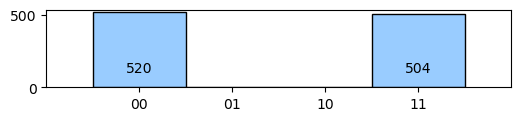

In [11]:
qute.plotHistogram(cts);

The statevector plot in the previous section showed the theoretical probabilities and phases.  The histogram above shows the actual counts observed over 1000 runs.  When using a real quantum computer, you cannot obtain the statevector, only the counts.

## 5. Another example

Let's work through another example to help you get familiar with Qiskit.  Build a circuit, this time with 3 qubits.  Apply an RX (X-rotation) gate to qubit 2, which puts it in an unequal superposition of $\ket{0}$ and $\ket{1}$:

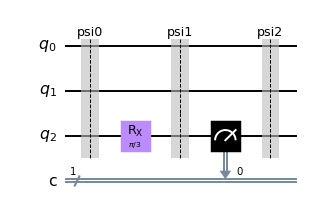

In [12]:
cir = qiskit.QuantumCircuit(3, 1) # create circuit with 3 qubits and 1 classical bit
cir.save_statevector('psi0')      # save initial statevector
cir.rx (np.pi/3, 2)               # apply 60-degree rotation about X axis to qubit 2
cir.save_statevector('psi1')      # save intermediate statevector
cir.measure([2], [0])             # measure qubit 2 to classical bit 0
cir.save_statevector('psi2')      # save final statevector
cir.draw('mpl', scale=.7)         # draw circuit using matplotlib graphics

For simplicity and brevity, we'll use `qute.run()` to simulate the circuit with default settings, `qute.getStatevectors()` to get the three statevectors saved from the final run, and `qute.getCounts()` to get the measurement result that was saved in the classical bit:

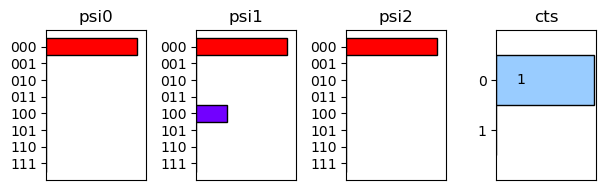

In [13]:
res  = qute.run(cir)                                   # run 
psis = qute.getStatevectors(res, 'psi')               # get saved statevectors from final run
cts  = qute.getCounts(res)                             # get counts (numbers of times each outcome was obtained)
fig,axs = qute.axgrid ([1,1,1,1], [1.5], padl=.5)     # make row of 4 Axes, each 1" wide x 1.5" tall
ax=axs[0,0]; qute.plotStatevector(psis[0], horiz=True,ax=ax); ax.set_title('psi0') # horizontal rainbow bar chart
ax=axs[0,1]; qute.plotStatevector(psis[1], horiz=True,ax=ax); ax.set_title('psi1')
ax=axs[0,2]; qute.plotStatevector(psis[2], horiz=True,ax=ax); ax.set_title('psi2')
ax=axs[0,3]; qute.plotHistogram  (cts,     horiz=True,ax=ax); ax.set_title('cts'); # horizontal histogram

In the code above we're using matplotlib in an object-oriented way.  We use `qute.axgrid()` to create a Figure and a numpy.ndarray of Axes.  We then call `qute.plotStatevector()` and `qute.plotHistogram()`, using the `ax` parameter to choose the Axes for drawing.

Note that Qiskit labels its basis states $\ket{q_{N-1} \dots q_2 q_1 q_0}$ by default.  Thus, the state $\ket{100}$ means $\ket{q_2=1, q_1=0, q_0=0}$.

During the first part of the circuit, the statevector evolves deterministically, so the plots for psi0 and psi1 will always look the same.  However, the measurement "gate" is stochastic, with a 75% chance of giving 0 and a 25% chance of giving 1.  Thus the plots of psi2 and cts may be different every time you run the simulation.

## 6. Visualizing quantum states on the Bloch sphere

The Bloch sphere is a sphere of radius 1.  Every point $(\theta,\phi)$ on the Bloch sphere represents a single-qubit state
$
\cos \tfrac{\theta}{2} \ket{0} + \sin \tfrac{\theta}{2} ~ e^{i\phi} \ket{1}
$.
The position vector of a point on the Bloch sphere is called a Bloch vector.
Define six single-qubit states corresponding to a Bloch vector pointing in the $\pm X$, $\pm Y$, and $\pm Z$ directions:

$\beq
\ket{\text{E}} &= \ket{+\text{X}} = \ket{\rightarrow} = \ket{+}  = \frac{\ket{0}+\ket{1}}{\sqrt{2}} \equiv \pmatrix{1/\sqrt{2}\\1/\sqrt{2}} \\
\ket{\text{W}} &= \ket{-\text{X}} = \ket{\leftarrow}  = \ket{-}  = \frac{\ket{0}-\ket{1}}{\sqrt{2}} \equiv \pmatrix{1/\sqrt{2}\\-1/\sqrt{2}} \\
\ket{\text{N}} &= \ket{+\text{Y}} = \ket{\otimes}     = \ket{i}  = \frac{\ket{0}+i\ket{1}}{\sqrt{2}} \equiv \pmatrix{1/\sqrt{2}\\i/\sqrt{2}} \\
\ket{\text{S}} &= \ket{-\text{Y}} = \ket{\odot}       = \ket{-i} = \frac{\ket{0}-i\ket{1}}{\sqrt{2}} \equiv \pmatrix{1/\sqrt{2}\\-i/\sqrt{2}} \\
\ket{\text{U}} &= \ket{+\text{Z}} = \ket{\uparrow}    = \ket{1}  \equiv \pmatrix{1\\0} \\
\ket{\text{D}} &= \ket{-\text{Z}} = \ket{\downarrow}  = \ket{0}  \equiv \pmatrix{0\\1} \\
\eeq$

The circuit below uses X, H, and S gates to set a 6-qubit state
$\ket{\text{E}} \otimes \ket{\text{W}} \otimes \ket{\text{N}} \otimes \ket{\text{S}} \otimes \ket{\text{U}} \otimes \ket{\text{D}}$:

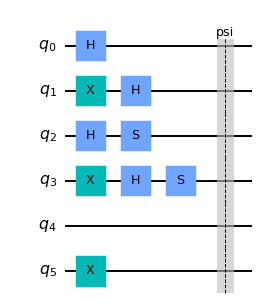

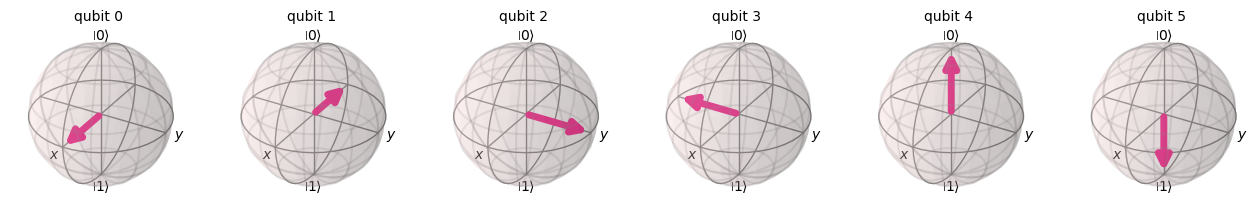

In [14]:
cir = qiskit.QuantumCircuit(6) # initialize all qubits to |U> = |0>
cir.h(0)                       # change qubit 0 to |E>
cir.x(1); cir.h(1)             # change qubit 1 to |W>
cir.h(2); cir.s(2)             # change qubit 2 to |N>
cir.x(3); cir.h(3); cir.s(3);  # change qubit 3 to |S>
                               # leave qubit 4  in |U>
cir.x(5)                       # change qubit 5 to |D>
cir.save_statevector('psi')    # save final statevector
display(cir.draw('mpl', scale=.7))
res = qute.run(cir)
psi = qute.getStatevector(res, 'psi')                 # get a single statevector
qiskit.visualization.plot_bloch_multivector (psi)

We have used `qiskit.visualization.plot_bloch_multivector()` to visualize the final state $\Psi$ as a set of Bloch vectors.  As expected, the six Bloch vectors point in the $\pm X$, $\pm Y$, and $\pm Z$ directions respectively.

Note that Bloch multivector plots are only useful for direct-product states.  They are not very useful for entangled states.

## 7. Measuring X, Y, and Z components of a qubit (spin)

In Qiskit, measuring a qubit means measuring it in the standard basis (Z basis).  This is equivalent to measuring the Z component of a spin-half spin.  We may measure the spin component along an arbitrary direction $\vec{\mathbf{n}}$ as follows:
1. Apply a rotation that maps $\mathbf{n}$ to the unit vector in the $Z$-direction, $+\mathbf{e}_Z$.
2. Measure in the Z basis.
3. Apply a rotation that maps $+\mathbf{e}_Z$ back to $\mathbf{n}$.
   
In the example below, a qubit is initialized in the $\ket{0}$ state.  It is then measured along the X direction.  Since $\ket{0} = \frac{\ket{\rightarrow} + \ket{\leftarrow}}{\sqrt{2}}$, the result of the measurement is equally likely to be 0 or 1.

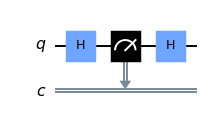

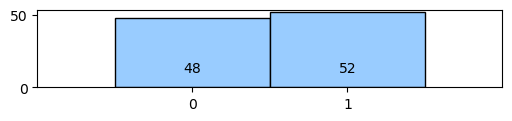

In [15]:
cir = qiskit.QuantumCircuit(1,1)
cir.h(0); cir.measure(0,0); cir.h(0)                       # measure qubit 0 along X
display(cir.draw('mpl', scale=.7, cregbundle=False))
res = qute.run (cir, shots=100)
cts = qute.getCounts (res)
qute.plotHistogram (cts);

In the example below, the qubit is measured along the Y direction using a sequence containing S and H gates.  Again, the measurement gives 0 or 1 with equal probabilities.

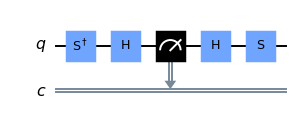

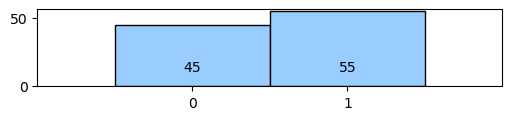

In [12]:
cir = qiskit.QuantumCircuit(1,1)
cir.sdg(0); cir.h(0); cir.measure(0,0); cir.h(0); cir.s(0) # measure qubit 0 along Y
display(cir.draw('mpl', scale=.7, cregbundle=False))
res = qute.run (cir, shots=100)
cts = qute.getCounts (res)
qute.plotHistogram (cts);

In the final example, the qubit $\ket{0}$ is measured along a direction at $60^\circ$ to the $+Z$ axis.  There is a 75% probability of getting 0 and a 25% probability of getting 1.

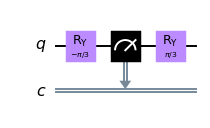

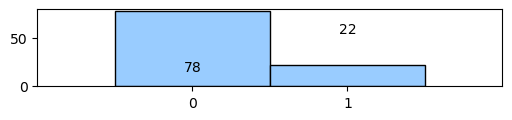

In [13]:
cir = qiskit.QuantumCircuit(1,1)
cir.ry(-np.radians(60),0); cir.measure(0,0); cir.ry(+np.radians(60),0)
display(cir.draw('mpl', scale=.7, cregbundle=False))
res = qute.run (cir, shots=100)
cts = qute.getCounts (res)
qute.plotHistogram (cts);

## Exercises

1. Build a quantum circuit with 2 qubits and 2 classical bits.
2. Use two Hadamard gates to prepare an equal superposition of all 2-qubit states, $\frac{\ket{00} + \ket{01} + \ket{10} + \ket{11}}{2}$.
3. Add a command to save the final statevector.
4. Visualize the circuit.
5. Run the circuit and visualize the statevector.
6. Add measurement "gates" to measure the 2 qubits to the 2 classical bits.
7. Run the circuit and visualize the histogram of measurement outcomes.  Your output should look something like this:

$\hspace{2cm}$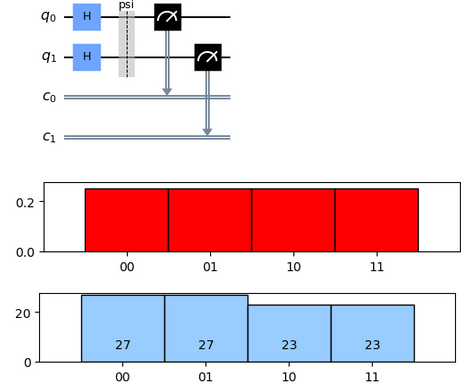

8. Use Hadamard, X, and controlled-S gates to build the circuit in the figure below.
9. The circuit prepares the state $\Psi = \frac{\ket{00} + i\ket{01} - \ket{10} - i\ket{11}}{2}$.  Verify this by visualizing the statevector and the histogram of measurement outcomes.

$\hspace{2cm}$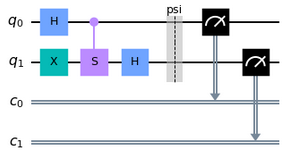

### Solutions

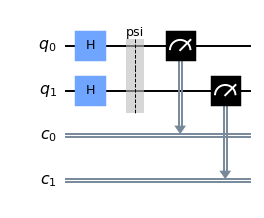

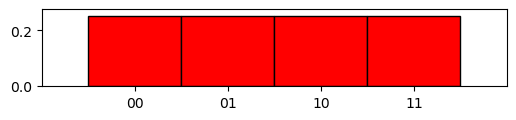

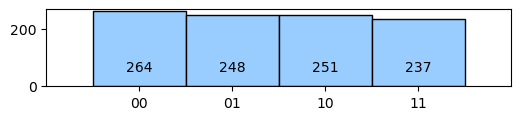

In [14]:
cir = qiskit.QuantumCircuit(2,2)
cir.h(0)
cir.h(1)
cir.save_statevector('psi') 
cir.measure ([0,1], [0,1])
display(cir.draw('mpl', scale=.7, cregbundle=False))
res = qute.run (cir, shots=1000)
psi = qute.getStatevector (res, 'psi')
qute.plotStatevector (psi);
cts = qute.getCounts (res)
qute.plotHistogram (cts);

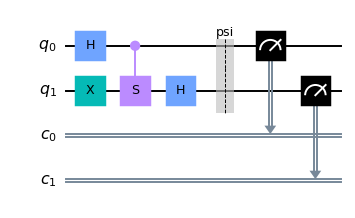

[ 0.50+0.00j  0.00+0.50j -0.50-0.00j  0.00-0.50j]


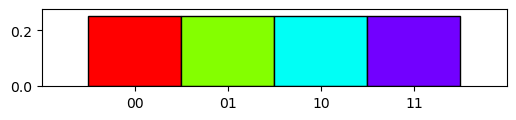

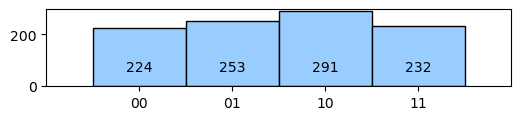

In [106]:
cir = qiskit.QuantumCircuit(2,2)
cir.x(1); cir.h(0); cir.cs(0,1) ; cir.h(1)
cir.save_statevector('psi') 
cir.measure ([0,1], [0,1])
display(cir.draw('mpl', scale=.7, cregbundle=False))
res = qute.run (cir, shots=1000)
psi = qute.getStatevector (res, 'psi')
qute.plotStatevector (psi);
cts = qute.getCounts (res)
qute.plotHistogram (cts);
np.set_printoptions (precision=2,floatmode='fixed',suppress=True); print (psi)